In [184]:
from sklearn import datasets
from sklearn.datasets import fetch_mldata
import numpy as np
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics

from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold
from sklearn import datasets, svm, preprocessing


In [ ]:
mnist = fetch_mldata('MNIST original', data_home='./data')

In [ ]:
mnist.data.shape

In [ ]:
np.random.seed(4367)
index = np.random.choice( int(mnist.data.shape[0]), (2000, 2), replace=False)

In [ ]:
digits = datasets.load_digits()


In [ ]:
np.sum(np.in1d(train_index,index))

In [ ]:
digits.data.shape

In [ ]:
np.sum( np.in1d(index,train_index, invert=True) )

In [ ]:
np.in1d(index,train_index, invert=True)

In [ ]:
train_index.shape

In [163]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
test_index = np.select( np.arange(mnist.data.shape[0]) != train_index)

In [296]:
%%time
def train_and_evalute(C=1, gamma=0.1, seed=200, fold=2):
    
    mnist = fetch_mldata('MNIST original', data_home='./data')
    
    # subsampling from 70000 items
    data, _, target, _ = train_test_split(mnist.data, mnist.target, test_size=0.96, random_state=seed)
    
    acc_basket = []
    
    kf = StratifiedKFold(target, fold)
    for train_index, test_index in kf:

        X_train = data[train_index,:]
        mean, std = np.mean(X_train), np.std(X_train)
        
        normalize = lambda x : (x - mean)/std
        
        X_train = normalize(X_train)
        X_test  = normalize(data[test_index,:])
        
        y_train = target[train_index]
        y_test  = target[test_index]


        classifier = svm.SVC(gamma=gamma, C=C, kernel="rbf")
        classifier.fit(X_train, y_train)

        y_predicted = classifier.predict(X_test)

        acc = np.mean(y_predicted == y_test)
        acc_basket.append(acc)

#     np.random.seed(seed)
#     index = np.random.choice( int(mnist.data.shape[0]), (5000, 2), replace=False)
    
#     data = mnist.data
#     target = mnist.target
#     X_train, X_test = data[index[:, 0],:], data[index[:, 1][:1000],:]
#     y_train, y_test = target[index[:, 0]], target[index[:, 1][:1000]]

#     data, target, _, _ = train_test_split(mnist.data, mnist.target, test_size=0.9, random_state=seed)
    

    print("------------")
    print("C: %f" % C)
    print("Gamma: %f" % gamma)
    print("Seed: %f" % seed)
    print("Accuracy: %f 士 %f" % (np.mean(acc_basket), np.std(acc_basket) ))
    
    return np.mean(acc_basket)

# Accuracy: 0.182853 士 0.007360
# 5.52745879e-01   7.84503235e+02
train_and_evalute(gamma=2**(-15), C=2**(-4), seed=4367)

------------
C: 0.062500
Gamma: 0.000031
Seed: 4367.000000
Accuracy: 0.111785 士 0.000197
CPU times: user 9.09 s, sys: 107 ms, total: 9.19 s
Wall time: 9.26 s


In [ ]:
IM = np.zeros((len(CS),len(GAMMA)))

In [444]:
%%time
CS = np.linspace(-5,10,20)
GAMMA = np.linspace(-10,4,20)


CPU times: user 139 µs, sys: 21 µs, total: 160 µs
Wall time: 155 µs


In [ ]:
count = 0
for i in range(len(GAMMA)):
    for j in range(len(CS)):
        c = 2**(CS[j])
        g = 2**(GAMMA[i])
        print('#%-2d : c=%f , gamma=%f' % (count+1, c, g))
        acc = train_and_evalute(gamma=g, C=c, seed=4367)
        IM[i,j] = acc
        count = count + 1


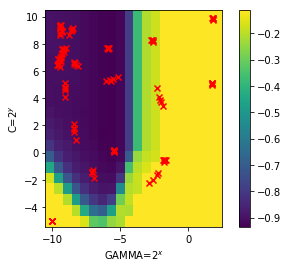

In [362]:
plt.xlabel('GAMMA=$2^x$')
plt.ylabel('C=$2^y$')
plt.imshow(-IM.T, origin='lower', extent=[GAMMA[0]-0.5,GAMMA[-1]+0.5, CS[0]-0.5, CS[-1]+0.5])
plt.colorbar()
x, _ =load_data('lstm-MIN-rbf')
x = np.log2(x.reshape(-1,2))
plt.scatter(x[:,0], x[:,1], c='r', marker='x')

In [438]:
def plot_prior_and_model(model, run_idx=0, take_log=True, colorbar=False, plot=plt):
    plt.xlabel('GAMMA=$2^x$')
    plt.ylabel('C=$2^y$')
    im = plot.imshow(-IM.T, origin='lower', extent=[GAMMA[0]-0.5,GAMMA[-1]+0.5, CS[0]-0.5, CS[-1]+0.5], vmin=-1, vmax=0)
    if colorbar:
        plt.colorbar()
    x, _ =load_data(model)
    if take_log:
        x = np.log2(x[run_idx,:,:])
    else:
        x = x[0]
    plt.scatter(x[:,0], x[:,1], c='r', marker='x')
    return im
# plot_prior_and_model('lstm-OI-rbf')

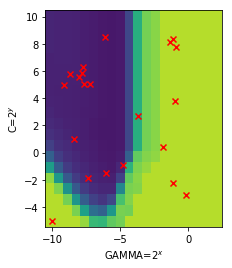

In [439]:
plot_prior_and_model('lstm-OI-rbf')

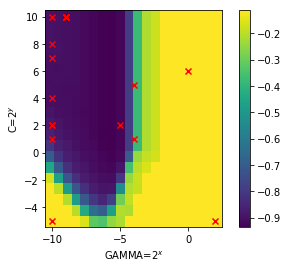

In [403]:
plot_prior_and_model('gp',take_log=False)

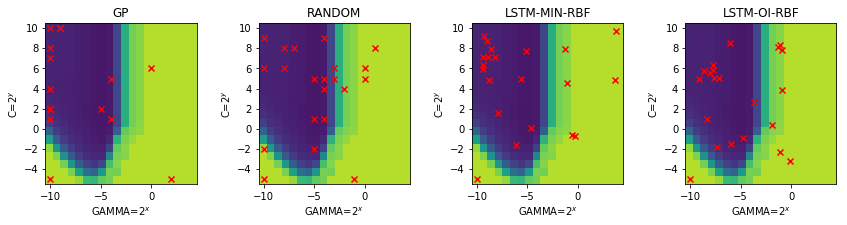

In [445]:
plt.figure(figsize=(12,4))
count = 1
for i in ['gp', 'random', 'lstm-MIN-rbf', 'lstm-OI-rbf']:
    plt.subplot(1,4,count)
    if i not in ['lstm-MIN-rbf', 'lstm-OI-rbf']:
        im =plot_prior_and_model(i, take_log=False)

    else:
        plot_prior_and_model(i)
    plt.title(i.upper())
    count += 1
fig.colorbar(im)
plt.tight_layout()

In [447]:
%store IM

Stored 'IM' (ndarray)


In [297]:
np.log2(1.431243)

0.51726863721658101

In [271]:
print(GAMMA)
np.power(2, GAMMA)

[-15.         -13.11111111 -11.22222222  -9.33333333  -7.44444444
  -5.55555556  -3.66666667  -1.77777778   0.11111111   2.        ]


array([  3.05175781e-05,   1.13021815e-04,   4.18576164e-04,
         1.55019634e-03,   5.74115036e-03,   2.12623438e-02,
         7.87450656e-02,   2.91632260e-01,   1.08005974e+00,
         4.00000000e+00])

In [ ]:
digits = datasets.load_digits()

target = digits.target
data = digits.images.reshape( (digits.images.shape[0], -1) )

In [ ]:
digits.images.shape

In [ ]:
target.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)


In [ ]:
X_test.shape

In [ ]:
from sklearn import preprocessing


In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

In [ ]:
scaler.fit([[0.0001]*2, [10,1000]])

In [ ]:
scaler.transform([(0.0001,0.0001)])

In [ ]:
scaler.data_max_

In [ ]:
scaler.inverse_transform([[-1,-1]])

In [ ]:
[(-1,1)]*2

In [ ]:
2**(-15)

In [ ]:
digits = datasets.load_digits()

In [ ]:
digits.data.shape

In [185]:
GAMMA_MIN = 2**(-15)
GAMMA_MAX = 2**(2)
C_MIN     = 2**(-5)
C_MAX     = 2**(4)

scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit([[GAMMA_MIN, C_MIN], [GAMMA_MAX, C_MAX]])

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [190]:
scaler.inverse_transform(np.array([0,0]).reshape(1,-1))

array([[ 2.00001526,  8.015625  ]])

In [191]:
(GAMMA_MIN + GAMMA_MAX)/2

2.0000152587890625

In [194]:
X = np.linspace(GAMMA_MIN, GAMMA_MAX, 1000)

In [208]:
Y = np.linspace(-1, 1, 1000)
XY = np.zeros((1000,2))
XY[:,0] =  Y
Y = scaler.inverse_transform(XY)[:,0]

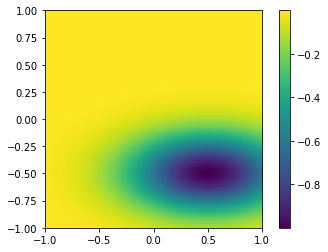

In [274]:
def f(x,y):
    std = 0.5
    return  -np.exp(- (np.power(x-0.5,2) + 4*np.power(y-0.5,2) )/std) 

X = np.linspace(-1,1,100)
XX, YY = np.meshgrid( X, X)
hm = f(XX.reshape(-1,1),YY.reshape(-1,1)).reshape((100,100))
plt.imshow(hm, extent=[-1,1,-1,1])

plt.colorbar()

In [230]:
f(XX.reshape(-1,1),YY.reshape(-1,1))

array([[ 2.        ],
       [ 1.96000408],
       [ 1.92082441],
       ..., 
       [ 1.92082441],
       [ 1.96000408],
       [ 2.        ]])

In [192]:
(C_MIN + C_MAX)/2

8.015625

In [189]:
C_MIN

0.03125

In [262]:
 2**(-10)

0.0009765625

In [276]:
np.log(0.111785)

-2.1911778954199148

In [277]:
np.log([0.007812 , 0.031250])

array([-4.85209427, -3.4657359 ])

In [298]:
def load_data(optimizer):
    y = np.load('./mnist-result/%s-samples_y.npy' % (optimizer) )
    x = np.load('./mnist-result/%s-samples_x.npy' % (optimizer) )
    return x,y

In [311]:
np.log2(0.000031)

-14.977372258937299